# Example notebook for using the image data loader

In [1]:
from pathlib import Path

import jax.numpy as jnp
import matplotlib.pyplot as plt

from organic.data_loader import TrainingImgLoader

The training image loader just reads in a sequence of files (in this case numpy files)
storing the images. Stored images should have a 3D shape, following the (Y, X, Channel)
index ordering (this is the standard assumed in most Python packages).

Note that when `normalize=True`, training images' intensity channels will be normalized 
to the unsigned unit interval $[-1, 1]$, where $-1$ represenents zero flux, and $1$ the
maximum flux reached in the training image. This is so negative activations matter in
the initial layers of the critic in the neural network.

## Continuous 2-zone disks

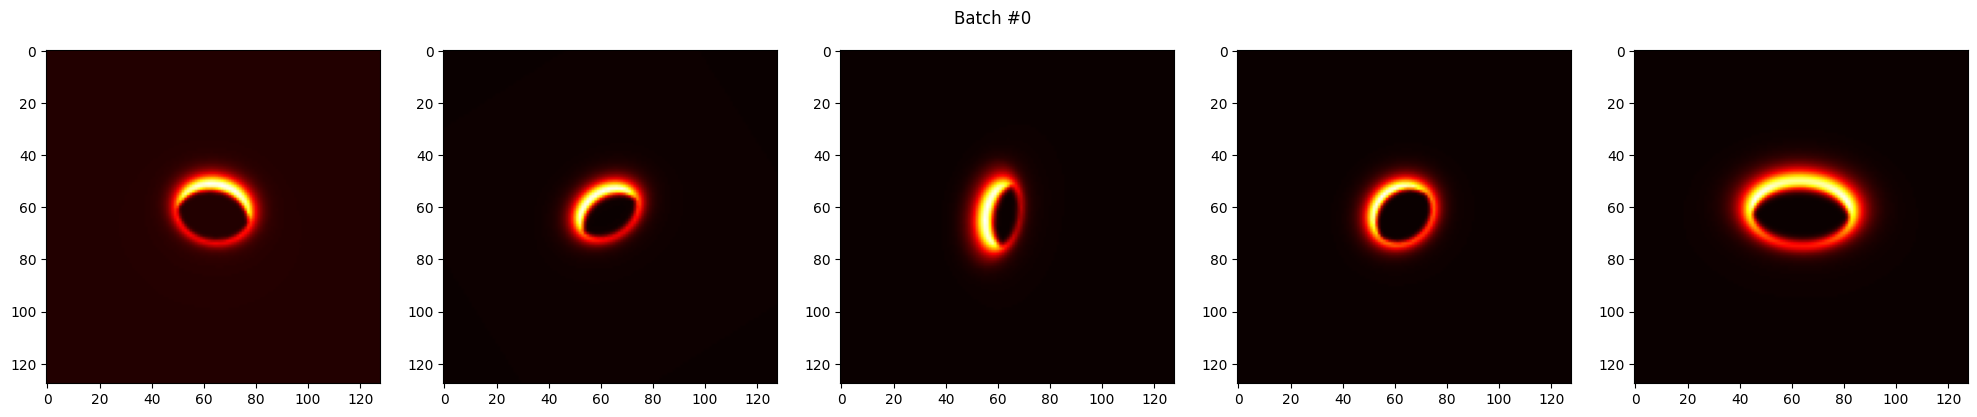

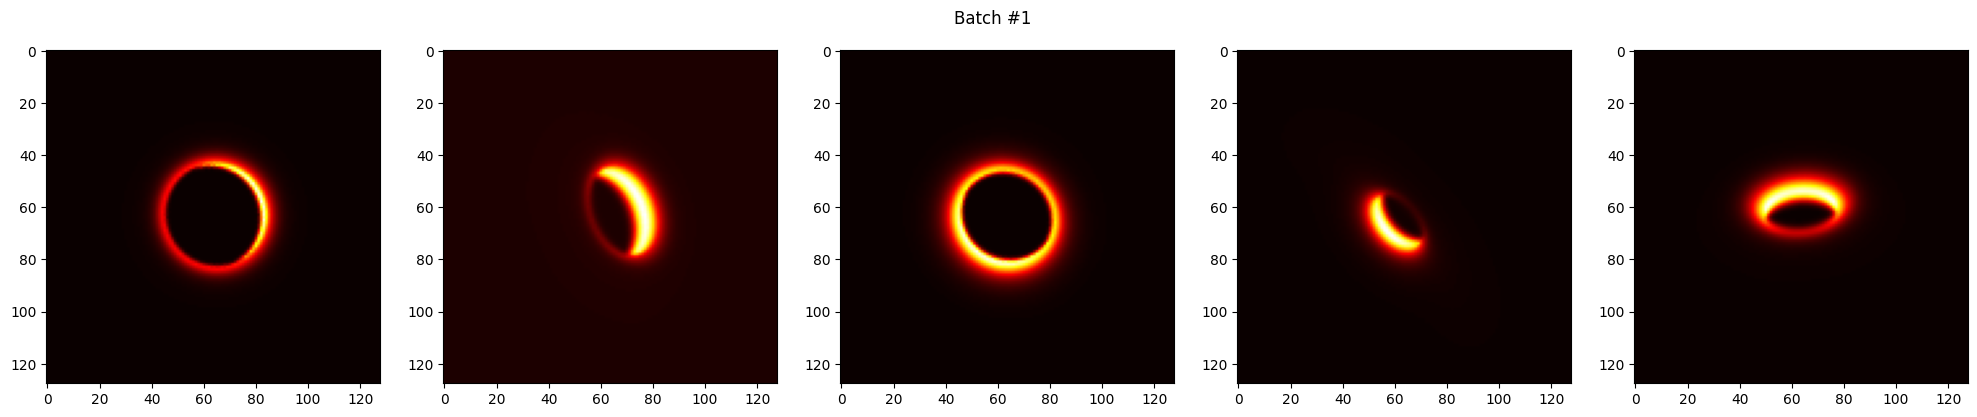

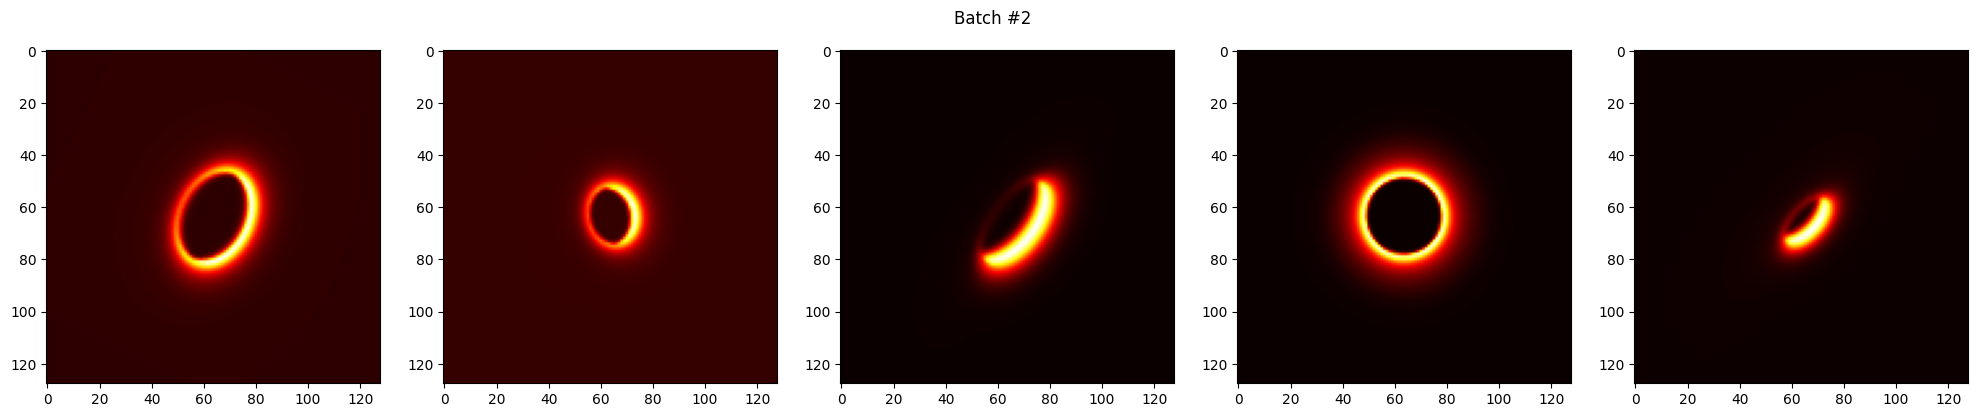

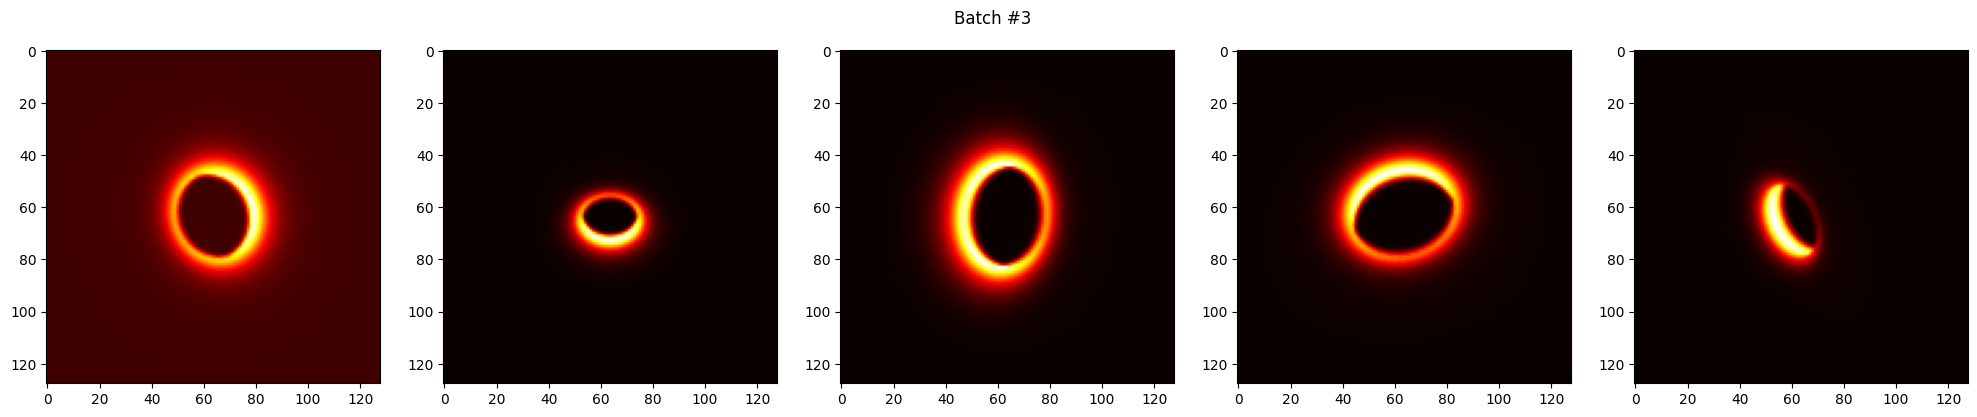

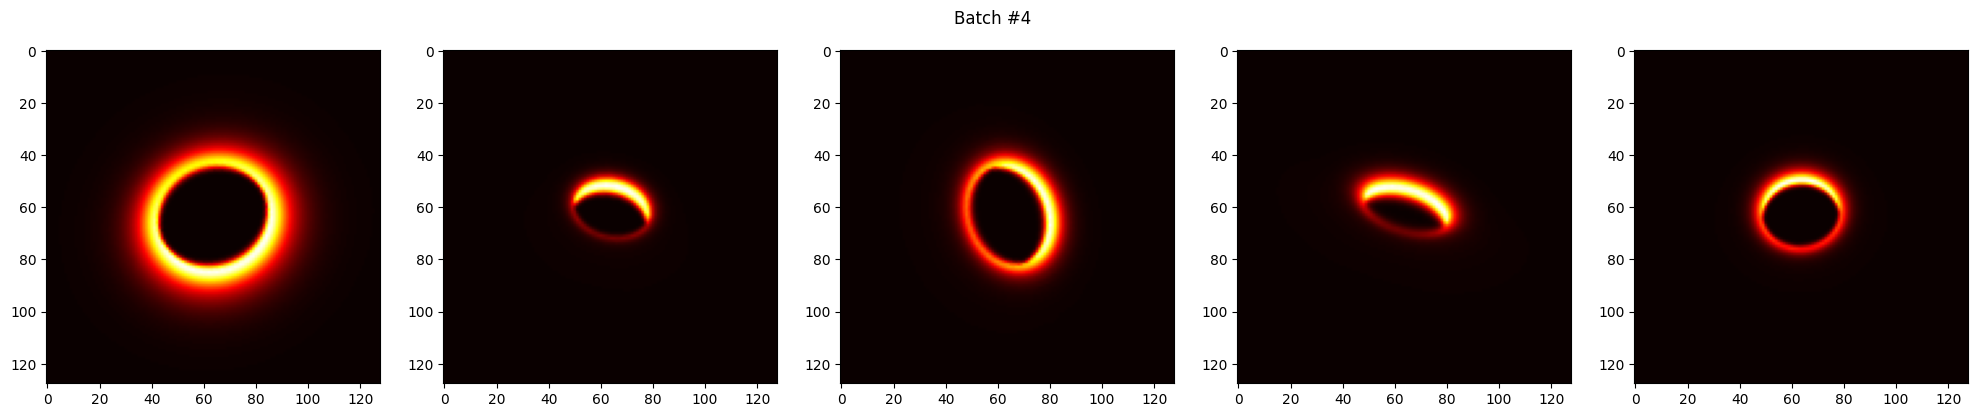

In [2]:
directory = """/home/toond/Documents/phd/paper_matisse_imaging/training_data/\
discs_mcfost/runs/ozstar_2zone_cont_training_set/saved_imgs"""

files = sorted(Path(directory).glob("*.npy"))

loader = TrainingImgLoader(
    files,
    batch_size=5,
    normalize=True,
    zoomf=(-0.1, 0.1),
    bkgf=(0.00, 0.10),
    pbkg=0.25,
    blur=0.5,
    rotate=True,
    fliph=True,
    flipv=True,
    read_mode="NUMPY",
    seed=42,
)

# For a generator function, have to zip (which truncates to the shortest of iterables)
# with e.g. a range to limit steps.
nbatch = 5
for step, batch in zip(range(nbatch), loader):
    batch_size = batch.shape[0]
    fig, ax = plt.subplots(1, batch_size, figsize=(batch_size * 4, 4))
    for i in range(batch_size):
        ax[i].imshow(
            batch[i, :, :, 0], cmap="hot", vmin=-1, vmax=jnp.max(batch[i, :, :, 0])
        )
    fig.suptitle(f"Batch #{step}")
    plt.tight_layout()
    plt.show()

## 2-zone disks with surface density enhancement to mimic a secondary ring

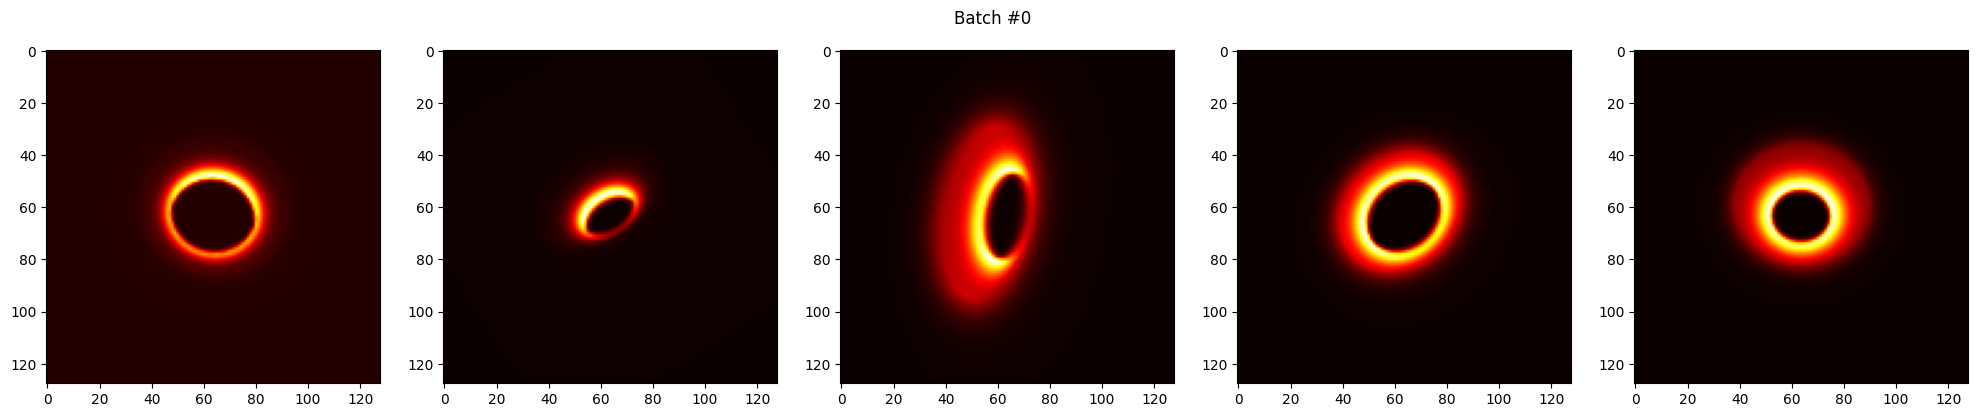

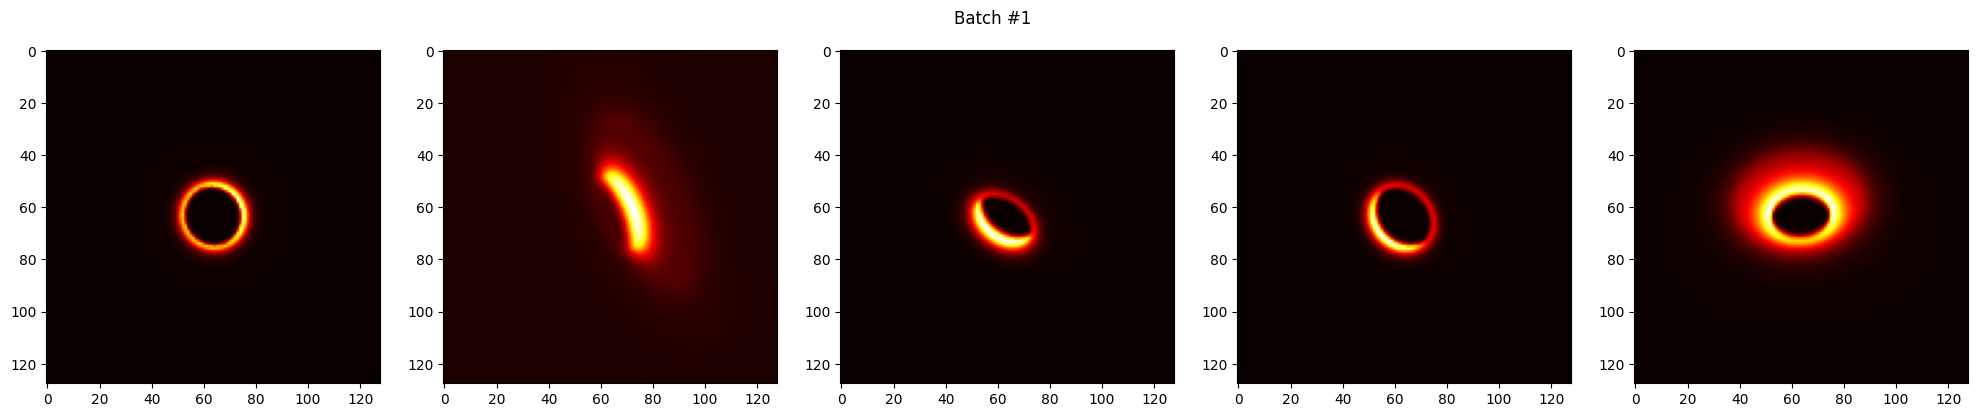

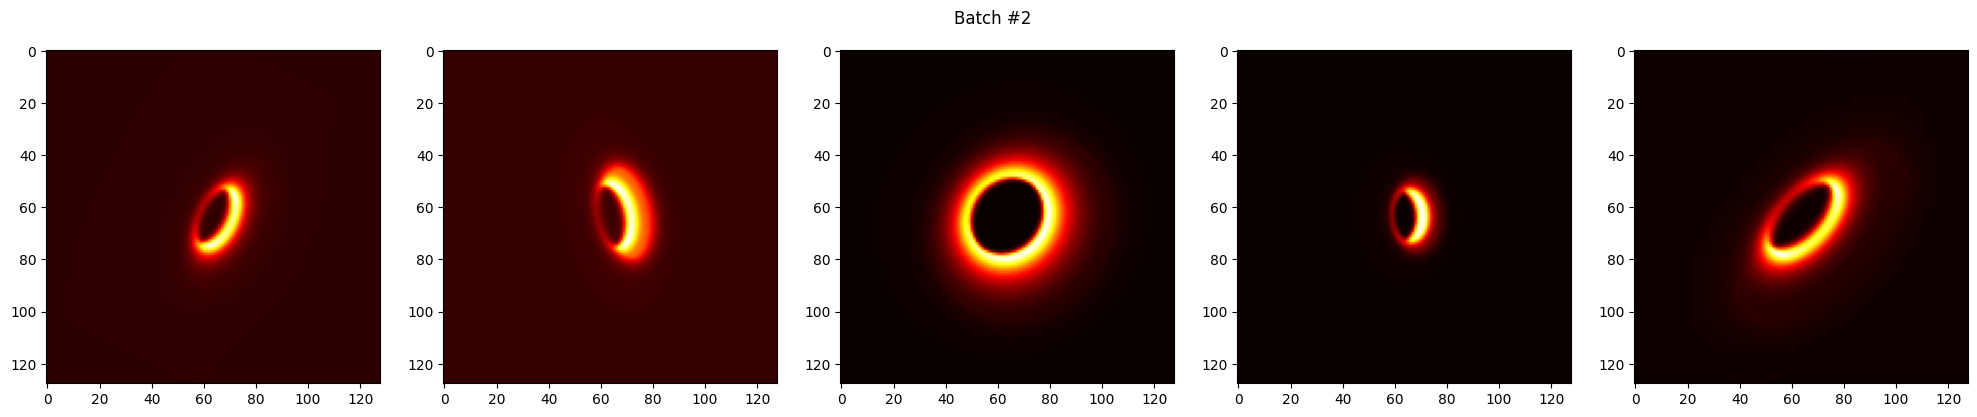

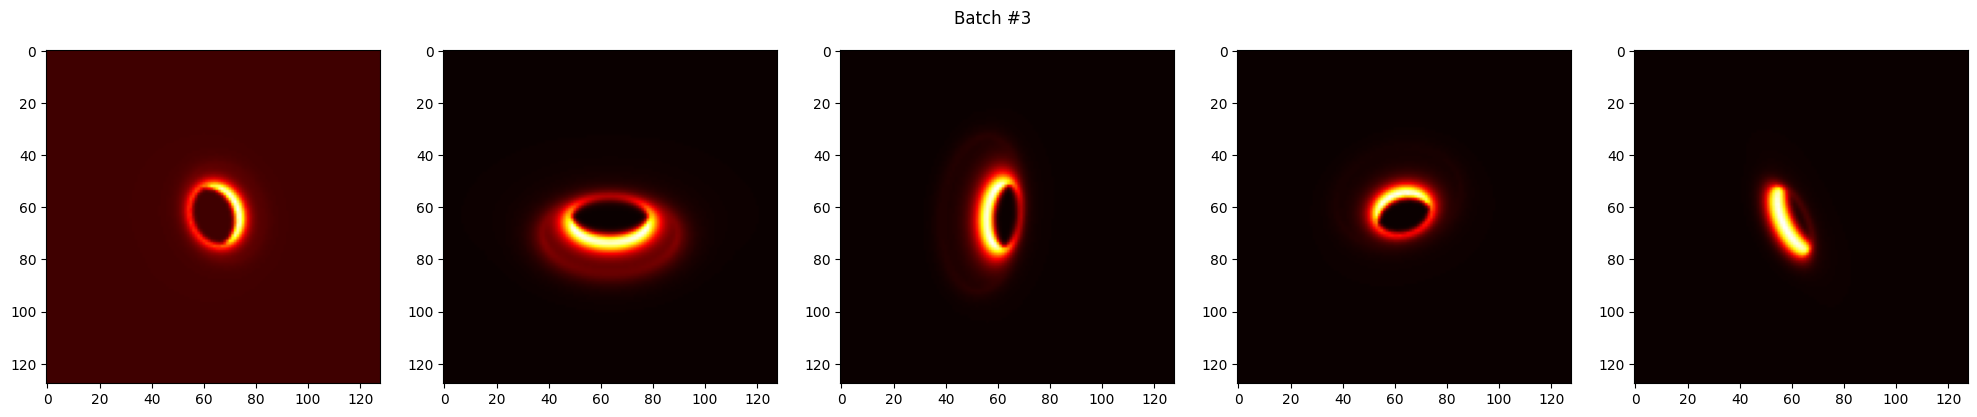

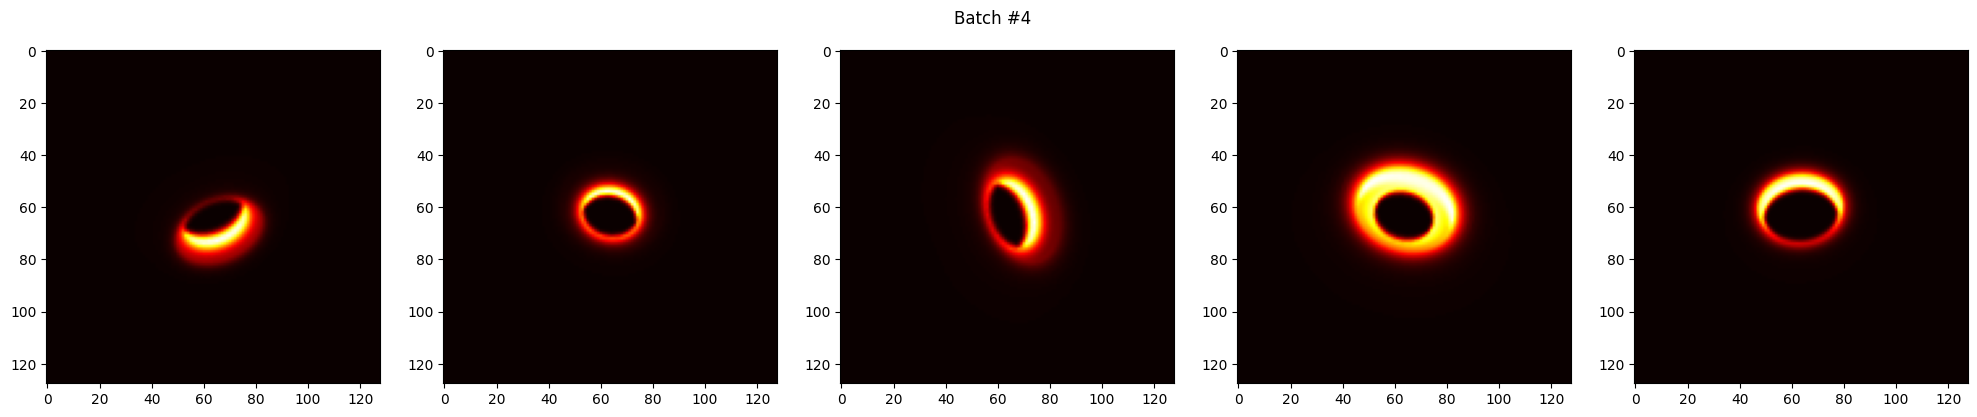

In [3]:
directory = """/home/toond/Documents/phd/paper_matisse_imaging/training_data/\
discs_mcfost/runs/ozstar_2zone_sig_bump_training_set/saved_imgs"""

files = sorted(Path(directory).glob("*.npy"))

loader = TrainingImgLoader(
    files,
    batch_size=5,
    normalize=True,
    zoomf=(-0.1, 0.1),
    bkgf=(0.00, 0.10),
    pbkg=0.25,
    blur=0.5,
    rotate=True,
    fliph=True,
    flipv=True,
    read_mode="NUMPY",
    seed=42,
)

# batch_generator = loader.get_batch_generator(5, normalize=True)

# For a generator function, have to zip (which truncates to the shortest of iterables)
# with e.g. a range to limit steps.
nbatch = 5
for step, batch in zip(range(nbatch), loader):
    batch_size = batch.shape[0]
    fig, ax = plt.subplots(1, batch_size, figsize=(batch_size * 4, 4))
    for i in range(batch_size):
        ax[i].imshow(
            batch[i, :, :, 0], cmap="hot", vmin=-1, vmax=jnp.max(batch[i, :, :, 0])
        )
    fig.suptitle(f"Batch #{step}")
    plt.tight_layout()
    plt.show()